# Average Entanglement Entropy in the QFT

In [1]:
#QISKIT
import qiskit.quantum_info as qi
from qiskit import Aer
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.extensions import UnitaryGate
from qiskit.visualization import array_to_latex
from qiskit.quantum_info.operators import Operator
from qiskit import execute, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.library import SaveDensityMatrix

#PYTHON
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import numpy as np
import random
import math
from sympy import factorint
from numpy import linalg
from numpy import pi
from sympy import *
from random import sample

print("Import Successfully")

Import Successfully


In [15]:
def qft_dagger(n):
    qc = QuantumCircuit(n)

    qubits = [n]
    size = n
    label = 40
    qc.append(SaveDensityMatrix(size, label = f'pho_%.1f' % (label)), [i for i in qubits])

    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
        label -= 1
        qc.append(SaveDensityMatrix(size, label = f'pho_%.1f' % (label)), [i for i in qubits])
        #qc.barrier(n - 1)
        
    for j in range(n):
        for m in range(j):
            label -= 1
            qc.cp(-np.pi/float(2**(j-m)), m, j)
            qc.append(SaveDensityMatrix(size, label = f'pho_%.1f' % (label)), [i for i in qubits])
        qc.h(j)
        label -=1
        qc.append(SaveDensityMatrix(size, label = f'pho_%.1f' % (label)), [i for i in qubits])
    return qc

In [16]:
n = 4
data = []

tmp = 0
for i in range(2*n - 2 + 1 ):
    tmp = tmp + 2*n - i

rho_step = int(n/2 + tmp + 1)                
somma = np.zeros(rho_step)

for l in range(2*n): 

    qubit = [l] 
    qc=qft_dagger(2*n)
    qc = qc.inverse()
    qc.measure_all()
    
    aer_sim = Aer.get_backend('aer_simulator')
    t_qc = transpile(qc, aer_sim)
    qobj = assemble(t_qc)                                
    results = aer_sim.run(qobj, shots = 1).result()
    counts = results.get_counts()

    labels = []
    for i in range(len(counts)):
        labels.append(int(list(counts.keys())[i], 2))

    negativities = []
    for i in (range(rho_step)):
        density_matrix = results.data()['pho_%.1f' % (i)]
        conjugate = density_matrix.transpose()
        product = np.matmul(conjugate, density_matrix) 
        root = np.sqrt(product)
        norm = root.trace()
       
        negativities.append((norm- 1)/2)
    
    data.append(negativities)

    
    qc_prova = qc
    negativities = 0
    qc = 0
    counts = 0
    results = 0
    density_matrix = 0
    t_qc = 0
    qobj = 0


CircuitError: 'Index 8 out of range for size 8.'

In [ ]:
qc_prova.draw(fold =- 1)

┌───┐                                                                                                                                                                                                     ░ ┌─┐                     
   q_0: ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■─────────────────────────────■─────────────────────────────■───────────────────■───────────────────■───────────────────■─────────■──────────┤ H ├────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────X────────────░─┤M├─────────────────────
                                                                                                                                                                                                                 │                             │                             │                   │                   │          ┌───┐    │         │P(π/2)    └───┘                                                                                                                                                                                        │            ░ └╥┘┌─┐                  
   q_1: ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■───────────────────────■──────────────────┼──────────■──────────────────┼─────────■───────────────────┼─────────■─────────┼─────────■─────────┼──────────┤ H ├────┼─────────■────────────X──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼────────────░──╫─┤M├──────────────────
                                                                                                                                                                      │                       │                  │          │                  │         │          ┌───┐    │         │         │         │P(π/2)   │          └───┘    │P(π/4)                │                                                                                                                                                                                          │            ░  ║ └╥┘┌─┐               
   q_2: ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■──────────────────■──────────────────┼─────────■─────────────┼─────────■────────┼──────────┼─────────■────────┼─────────┼──────────┤ H ├────┼─────────┼─────────┼─────────■─────────┼───────────────────■────────────X─────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┼────────────░──╫──╫─┤M├───────────────
                                                                                                                                │                  │                  │         │       ┌───┐ │         │        │          │         │P(π/2)  │         │          └───┘    │         │P(π/4)   │                   │P(π/8)                          │         │                                                                                                                                                                                          │            ░  ║  ║ └╥┘┌─┐            
   q_3: ───────────────────────────────────────────────────────────────────────────────────────■──────────────────■─────────────┼─────────■────────┼─────────■────────┼─────────┼───────┤ H ├─┼─────────┼────────┼──────────┼─────────■────────┼─────────┼───────────────────┼─────────■─────────┼───────

c:\Users\giuli\anaconda3\envs\quiskit\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


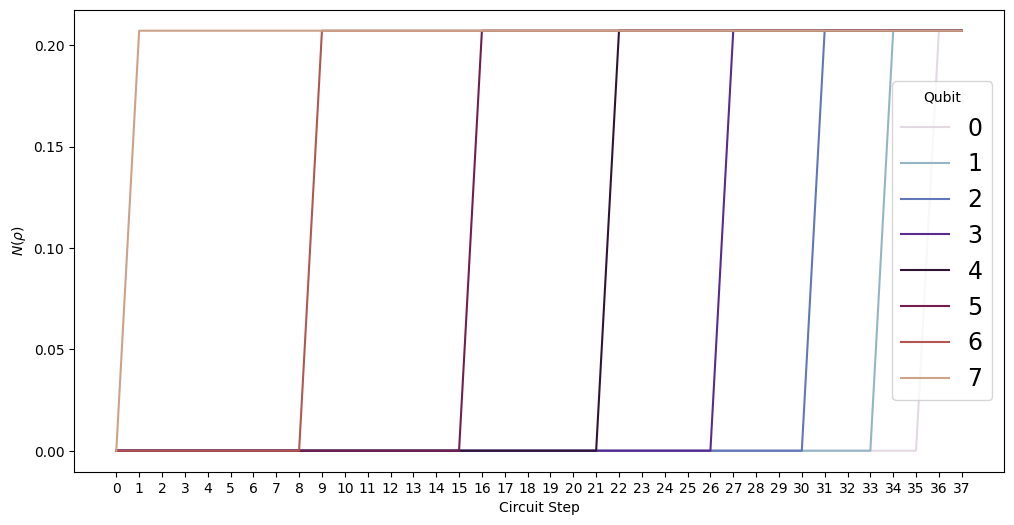

In [ ]:
cmap = plt.get_cmap('twilight')

plt.rc('figure', figsize=(12, 6))
params = {'text.usetex' : True, 'font.size' : 12, 'font.family' : 'serif'}
#plt.rcParams.update(params)

xs = []
for i in range(len(data[0])):
    xs.append(i)
 
plt.xticks(xs)
plt.xlabel('Circuit Step')
plt.ylabel(r"$N(\rho)$")
for i in range(2*n):
    color = cmap(i/(2*n))
    plt.plot(data[i], label=f'{i}', color = color)
plt.legend(fontsize = 17, loc = 'right', title = 'Qubit')
#plt.savefig('qft_ent_partitionsSINGLE.pdf', format = 'pdf')
#plt.plot(data)
